<a href="https://colab.research.google.com/github/TaliNatan/DSPS_TNatan/blob/main/HW4_TNatan/MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dark Matter

## Deriving $v \propto \frac{1}{r}$ from $F = \frac{GMm}{r^2}$

$F = \frac{GMm}{r^2}$ <br>
<br>
$m a = \frac{GMm}{r^2}$ <br>
<br>
$m \frac{v^2}{r} = \frac{GMm}{r^2}$ <br>
<br>
$v^2 = \frac{GM}{r}$ <br>
<br>
$v = \sqrt{\frac{GM}{r}}$<br>
<br>
$v \propto \sqrt{\frac{1}{r}}$

In [2]:
#package I will use for constants and units conversion
import astropy
from astropy.constants import G
from astropy import units as u

#package used to display latex formuale
from IPython.display import Latex

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
m31 = pd.read_csv('m31.csv', delimiter = ',', skipinitialspace=True, header=1)
m31 = m31.rename({'#R(kpc': 'R(kpc)', 'St.dev.': 'St.dev'}, axis='columns')

## Exploratory Data Analysis

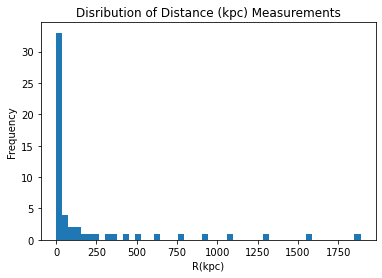

In [4]:
m31["R(kpc)"].plot(kind="hist", title="Disribution of Distance (kpc) Measurements", bins = 50)
plt.xlabel('R(kpc)')
plt.show()

The above histogram gives the counts for stars measured at various distances from the center of M31. As we can see from this figure, most of the stars sampled are very close to the center of the galaxy and at distances beyond the luminous radius of the galaxy (~42 kpc), there are few datapoints. From this, it is maybe only fair to draw conclusions from the data within ~100 kpc.

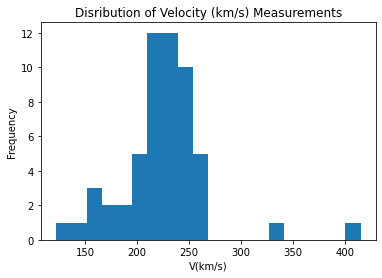

In [5]:
m31["V(km/s)"].plot(kind="hist", title="Disribution of Velocity (km/s) Measurements", bins = 20)
plt.xlabel('V(km/s)')
plt.show()

The above figure gives the counts of various measured velocities. Most of the measured velocities fall around ~225 km/s with a longer tail in the direction of smaller velocities. There is a sharp drop above ~275 km/s with few stars at greater velocities.

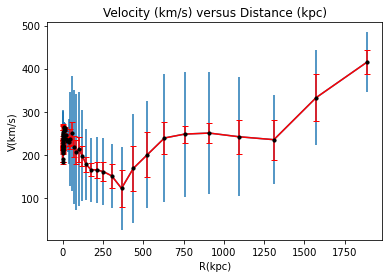

In [6]:
plt.scatter(m31["R(kpc)"], m31["V(km/s)"], c = 'k', s = 10, zorder = 10)
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], m31["St.dev"])
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], m31["St.error"], c = 'r', capsize=3)

plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")
plt.show()

The above plot shows the measured velocity (km/s) versus distance from galactic center R (kpc) with various errors plotted with it. As a snapshot of the data, we see that the relationship between V and R is not immediatly clear but sections of the data look 1:1.

## Extent of the Luminous Component
$3.167\degree * 1\degree$<br> 
[$765 \pm 28$ kpc](https://arxiv.org/abs/1110.3769)

In [7]:
m31angS = 3.167 * u.degree
m31dist = 765 * u.kpc
m31distErr = 28 * u.kpc

m31size = np.sin(m31angS) * m31dist
m31sizeErr = np.sin(m31angS) * m31distErr

print("Distance to Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(m31dist, m31distErr))

print("Physical size of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(m31size, m31sizeErr))

Distance to Andromeda: 765.0 kpc +/- 28.0 kpc
Physical size of the visible component of Andromeda: 42.3 kpc +/- 1.5 kpc


In [8]:
where = np.where(m31["R(kpc)"] >= m31size/u.kpc)[0][0]
print("Smallest radius where the luminous mass is completely included: " +
      r"{:.1f}".format(m31["R(kpc)"][where])+ " kpc")
print("Here, the velocity is: " +
      r"{:.1f}".format(m31["V(km/s)"][where])+ " (km/s)")

Smallest radius where the luminous mass is completely included: 49.2 kpc
Here, the velocity is: 237.1 (km/s)


In [9]:
def getradii(data, N, size): # FROM SHAR
  '''
  this function finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy
  data: our dataset which is a pandas dataframe
  N: multiplicative factor
  size: physical size of the luminos component of the velocity
  returns: value of the radius, value of the velocity, velocity error, total error
  '''
  cutarray = (data[data["R(kpc)"]>N*size])
  #print(cutarray.iloc[0])
  r, v, dv, err = cutarray.iloc[0]
  return r, v, dv, err

In [10]:
n1 = getradii(m31, 1, m31size/u.kpc)
n2 = getradii(m31, 2, m31size/u.kpc)
n3 = getradii(m31, 3, m31size/u.kpc)

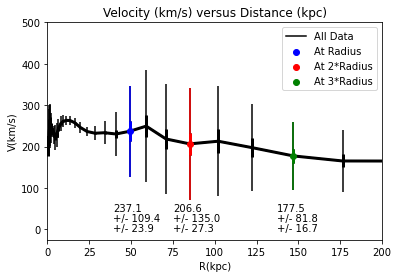

In [11]:
plt.plot(m31["R(kpc)"], m31["V(km/s)"], c = 'k', label = 'All Data')
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], yerr=m31["St.dev"], c = 'k')
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], yerr=m31["St.error"], c = 'k', linewidth = 3)

plt.scatter(n1[0],n1[1], c = 'b', zorder = 10, label = 'At Radius')
plt.errorbar(n1[0],n1[1], yerr=n1[2], c = 'b')
plt.errorbar(n1[0],n1[1], yerr=n1[3], c = 'b', linewidth = 3)


plt.scatter(n2[0],n2[1], c = 'r', zorder = 10, label = 'At 2*Radius')
plt.errorbar(n2[0],n2[1], yerr=n2[2], c = 'r')
plt.errorbar(n2[0],n2[1], yerr=n2[3], c = 'r', linewidth = 3)

plt.scatter(n3[0],n3[1], c = 'g', zorder = 10, label = 'At 3*Radius')
plt.errorbar(n3[0],n3[1], yerr=n3[2], c = 'g')
plt.errorbar(n3[0],n3[1], yerr=n3[3], c = 'g', linewidth = 3)

plt.legend(loc = 'upper right')

plt.text(n1[0]-10,45, r"{:.1f}".format(n1[1]))
plt.text(n1[0]-10,20, "+/- {:.1f}".format(n1[2]))
plt.text(n1[0]-10,-5, "+/- {:.1f}".format(n1[3]))

plt.text(n2[0]-10,45, r"{:.1f}".format(n2[1]))
plt.text(n2[0]-10,20, "+/- {:.1f}".format(n2[2]))
plt.text(n2[0]-10,-5, "+/- {:.1f}".format(n2[3]))

plt.text(n3[0]-10,45, r"{:.1f}".format(n3[1]))
plt.text(n3[0]-10,20, "+/- {:.1f}".format(n3[2]))
plt.text(n3[0]-10,-5, "+/- {:.1f}".format(n3[3]))

plt.xlim(0, 200)
plt.ylim(-25, 500)

plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")

plt.show()

The above plot shows the measured velocity (km/s) versus distance from galactic center R (kpc) with various errors plotted with it. The luminous radius (blue), two times the luminous radius (red), and three times the luminous radius (green) are highlighted in the data with the specific velocities and errors in km/s. Over this range of the data, the relationship between V and R looks pretty flat, though slightly decreasing (but within the error, still flat).

# START HOMEWORK 8

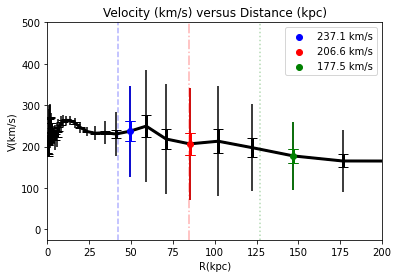

In [27]:
plt.plot(m31["R(kpc)"], m31["V(km/s)"], c = 'k')
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], yerr=m31["St.dev"], c = 'k')
plt.errorbar(m31["R(kpc)"], m31["V(km/s)"], yerr=m31["St.error"], capsize=5, c = 'k', linewidth = 3)

plt.scatter(n1[0],n1[1], c = 'b', zorder = 10, label = r"{:.1f} km/s".format(n1[1]))
plt.errorbar(n1[0],n1[1], yerr=n1[2], c = 'b')
plt.errorbar(n1[0],n1[1], yerr=n1[3], capsize=5, c = 'b', linewidth = 3)


plt.scatter(n2[0],n2[1], c = 'r', zorder = 10, label = r"{:.1f} km/s".format(n2[1]))
plt.errorbar(n2[0],n2[1], yerr=n2[2], c = 'r')
plt.errorbar(n2[0],n2[1], yerr=n2[3], capsize=5, c = 'r', linewidth = 3)

plt.scatter(n3[0],n3[1], c = 'g', zorder = 10, label = r"{:.1f} km/s".format(n3[1]))
plt.errorbar(n3[0],n3[1], yerr=n3[2], c = 'g')
plt.errorbar(n3[0],n3[1], yerr=n3[3], capsize=5, c = 'g', linewidth = 3)

plt.axvline(x = 42.263523, color = 'b', linestyle = '--', alpha = 0.3)
plt.axvline(x = 84.527046, color = 'r', linestyle = '-.', alpha = 0.3)
plt.axvline(x = 126.79057, color = 'g', linestyle = ':', alpha = 0.3)

plt.legend(loc = 'upper right')

plt.xlim(0, 200)
plt.ylim(-25, 500)

plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")

plt.show()

The above (updated) plot shows hows the measured velocity (km/s) versus distance from galactic center R (kpc) with systematic and statistical errors. The luminous radius (blue dashed vertical line), two times the luminous radius (red dashed dotted vertical line), and three times the luminous radius (green dotted vertical line) and the data that falls clostest to each of those vertical lines (blue, red, green datapoint) are shown. Over this range of the data, the relationship between V and R looks moderately flat, though slightly decreasing (within error, still flat).

# END HOMEWORK 8 STUFF

In [13]:
G = 6.674*10**-11

In [14]:
def ugh(data, N, R, M):
  '''
  this function calculates the ratio of expected to actual velocity
  data: dataset we are using
  N: multiplicative factor
  R: luminous radius
  M: mass of galaxy in kg
  returns: ratio of v_diff_exp to v_diff_act
  '''
  
    r = np.zeros(len(N))
    v = np.zeros(len(N))
    dv = np.zeros(len(N))
    err = np.zeros(len(N))

    for i in range(len(N)):
        r[i], v[i], dv[i], err[i] = getradii(data, N[i], R)
    
    r = r * 3.086 * 10**19

    v_diff_exp = np.sqrt(G*M/r[1]) - np.sqrt(G*M/r[0])
    v_diff_act = v[1] - v[0]

    ratio = v_diff_exp/v_diff_act

    return ratio

IndentationError: unexpected indent (985301879.py, line 11)

In [ ]:
ratio = ugh(m31, [1,1.5], 49.2, 2*10**42)
print("The ratio between expected and actual velocity is: " + r"{:.1f}".format(ratio))


The ratio between expected and actual velocity is: 2328.2


## Now for the Milky Way

In [ ]:
#MW,Grand,Rotation,Curve
mw = pd.read_csv('mw.csv', delimiter = ',', skipinitialspace=True, header=1)
mw = mw.rename({'St.dev.': 'St.dev'}, axis='columns')

ratio = ugh(mw, [1,1.5], 26.8, 2.28667*10**42)
print("The ratio between expected and actual velocity is: " + r"{:.1f}".format(ratio))

The ratio between expected and actual velocity is: 1497.5


In [ ]:
n1 = getradii(mw, 1, 26.8)
n2 = getradii(mw, 2, 26.8)
n3 = getradii(mw, 3, 26.8)

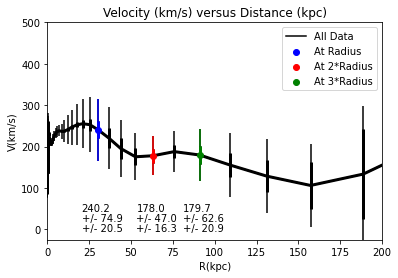

In [ ]:
plt.plot(mw["R(kpc)"], mw["V(km/s)"], c = 'k', label = 'All Data')
plt.errorbar(mw["R(kpc)"], mw["V(km/s)"], yerr=mw["St.dev"], c = 'k')
plt.errorbar(mw["R(kpc)"], mw["V(km/s)"], yerr=mw["St.error"], c = 'k', linewidth = 3)

plt.scatter(n1[0],n1[1], c = 'b', zorder = 10, label = 'At Radius')
plt.errorbar(n1[0],n1[1], yerr=n1[2], c = 'b')
plt.errorbar(n1[0],n1[1], yerr=n1[3], c = 'b', linewidth = 3)


plt.scatter(n2[0],n2[1], c = 'r', zorder = 10, label = 'At 2*Radius')
plt.errorbar(n2[0],n2[1], yerr=n2[2], c = 'r')
plt.errorbar(n2[0],n2[1], yerr=n2[3], c = 'r', linewidth = 3)

plt.scatter(n3[0],n3[1], c = 'g', zorder = 10, label = 'At 3*Radius')
plt.errorbar(n3[0],n3[1], yerr=n3[2], c = 'g')
plt.errorbar(n3[0],n3[1], yerr=n3[3], c = 'g', linewidth = 3)

plt.legend(loc = 'upper right')

plt.text(n1[0]-10,45, r"{:.1f}".format(n1[1]))
plt.text(n1[0]-10,20, "+/- {:.1f}".format(n1[2]))
plt.text(n1[0]-10,-5, "+/- {:.1f}".format(n1[3]))

plt.text(n2[0]-10,45, r"{:.1f}".format(n2[1]))
plt.text(n2[0]-10,20, "+/- {:.1f}".format(n2[2]))
plt.text(n2[0]-10,-5, "+/- {:.1f}".format(n2[3]))

plt.text(n3[0]-10,45, r"{:.1f}".format(n3[1]))
plt.text(n3[0]-10,20, "+/- {:.1f}".format(n3[2]))
plt.text(n3[0]-10,-5, "+/- {:.1f}".format(n3[3]))

plt.xlim(0, 200)
plt.ylim(-25, 500)

plt.xlabel("R(kpc)")
plt.ylabel("V(km/s)")
plt.title("Velocity (km/s) versus Distance (kpc)")

plt.show()

The above plot shows the measured velocity (km/s) versus distance from galactic center R (kpc) with various errors plotted with it. The luminous radius (blue), two times the luminous radius (red), and three times the luminous radius (green) are highlighted in the data with the specific velocities and errors in km/s. Over this range of the data, the relationship between V and R looks pretty flat, though slightly decreasing (but within the error, still flat).

# <mark>WFF</mark> Missing the tests for whether newtonian gravity holds at increasing r.

# 2.  MCMC Problem 

In [ ]:
def gaussian(x, sigma, mu):
  '''
  this function calculates the "y" value of a gaussian curve given an "x"
  x: "x" value of a gaussian
  sigma: spread of the gaussian
  mu: mean of the gaussian
  returns: "y" value of a gaussian
  '''

    gaussian = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((x-mu)/sigma)**2)
    return gaussian

In [ ]:
np.random.seed(123)

sigma = np.sqrt(2)
mu = 2

x0 = 0 
accepted = [x0]

for _ in range(10**4):
    x1 = np.random.normal(x0, 1)
    g = gaussian(x1, sigma, mu)
    x2 = gaussian(x0, sigma, mu)

    ratio = g / x2

    rand = np.random.rand()
    if ratio > rand:
        x0 = x1
    accepted.append(x1)

    x1 = x0

In [ ]:
range = np.histogram(accepted, bins = 100)[0]/np.histogram(accepted, bins = 100)[0].max()
domain = np.histogram(accepted, bins = 100)[1]

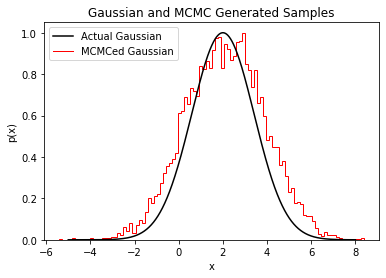

In [ ]:
x = np.linspace(-5, 8, 10**4)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((x-mu)/sigma)**2)
y = y/y.max()


plt.plot(x,y, zorder = 10, c = 'k', label = "Actual Gaussian")
plt.stairs(range, domain, color = 'r', label = "MCMCed Gaussian")
# plt.bar(domain[:-1], range, width = 0.5, color = 'r', label = "MCMCed Gaussian")

plt.legend(loc = 'upper left')

plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("Gaussian and MCMC Generated Samples")

plt.show()

The above plot shows and actual gaussian (black line) with MCMC sampled values (red bars). The MCMCed data does an ok job of capturing the actual gaussian.